In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1.Load the Data

In [26]:
df = pd.read_excel('electric_consumption.xlsx',sheet_name='Book1',header=None)
df.columns = ['Date','Consumption']
df

,Date,Consumption
0,"January, 2013","21,275,408"
1,"February, 2013","18,841,713"
2,"March, 2013","20,463,934"
3,"April, 2013","19,139,249"
4,"May, 2013","19,511,729"
...,...,...
60,"January, 2018","25,871,914"
61,"February, 2018","22,797,849"
62,"March, 2018","24,090,073"
63,"April, 2018","22,728,731"


In [27]:
df.Date = pd.to_datetime(df.Date)
df['Consumption'] = df['Consumption'].str.replace(',', '')
df

,Date,Consumption
0,2013-01-01,21275408
1,2013-02-01,18841713
2,2013-03-01,20463934
3,2013-04-01,19139249
4,2013-05-01,19511729
...,...,...
60,2018-01-01,25871914
61,2018-02-01,22797849
62,2018-03-01,24090073
63,2018-04-01,22728731


In [28]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [29]:
df.head()

,Date,Consumption,year,month
0,2013-01-01,21275408,2013,1
1,2013-02-01,18841713,2013,2
2,2013-03-01,20463934,2013,3
3,2013-04-01,19139249,2013,4
4,2013-05-01,19511729,2013,5


In [30]:
df['Consumption'] = df['Consumption'].astype(int)

Text(0, 0.5, 'MWh')

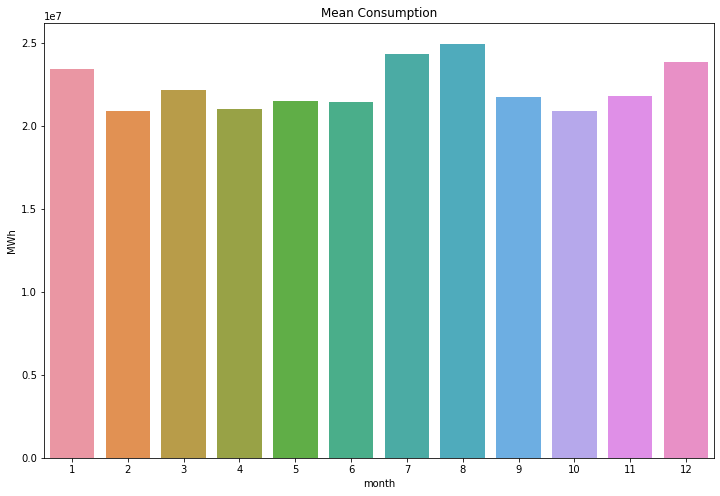

In [31]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df.groupby('month').Consumption.mean().index,
                 y=df.groupby('month').Consumption.mean().values, data=df)
ax.set_title('Mean Consumption')
ax.set_ylabel('MWh')

Text(0, 0.5, 'MWh')

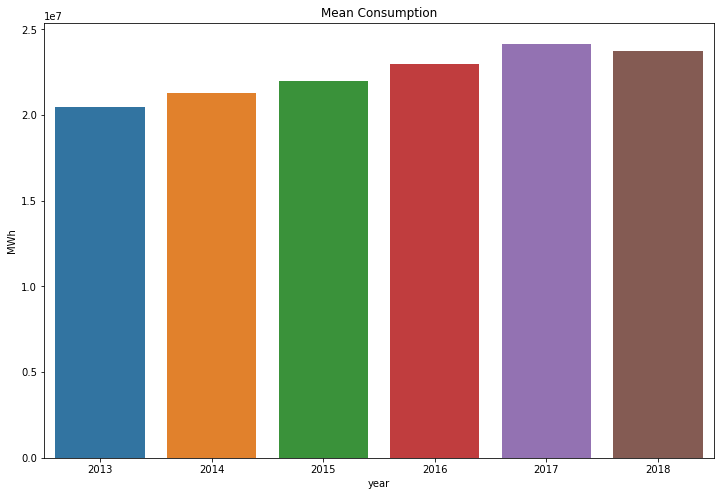

In [32]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df.groupby('year').Consumption.mean().index,
                 y=df.groupby('year').Consumption.mean().values, data=df)
ax.set_title('Mean Consumption')
ax.set_ylabel('MWh')

In [33]:
import plotly
import chart_studio.plotly as ip
import plotly.io as pio
import plotly.graph_objs as go

In [34]:
fig = go.Scatter(x=list(df.Date),
                   y=list(df.Consumption), line=dict(color='red'))

dat = [trace]
fig.update_layout(title_text='consumption')
pio.write_html(fig, file='consumption.html', auto_open=True)


AttributeError: 'Scatter' object has no attribute 'update_layout'

In [ ]:
df.set_index('Date', inplace=True)
df.head()

## 2.Plot the time series

In [ ]:
df['Consumption'].astype(int).plot()

## Remove trend

In [ ]:
df['Consumption'].astype(int).diff()

In [ ]:
df['difference'] = df['Consumption'].astype(int).diff()
df.head()

In [ ]:
df['difference'].plot()

In [ ]:
df['second_order_difference'] = df['difference'].diff()
df.head()

In [ ]:
df['second_order_difference'].plot()
